In [1]:
import pandas as pd
# french_departments = pd.read_json("french_department.json", orient='records')

In [2]:
import json
f = open('french_department.json')
data = json.load(f)

In [36]:
new_structure_json = {}
new_structure_json['type'] = "Topology"
new_structure_json['arcs'] = []


new_structure = []
for each in data['features']:
    id_ = each['properties']['code']
    name_ = each['properties']['nom']

    std_polygon_ = []
    for row in each['geometry']['coordinates']:
        while len(row) < 2:
            row = row[0]
        for each_tuple in row:
            std_polygon_.append((each_tuple[0],each_tuple[1]))
#             new_structure_json['arcs'].append([each_tuple[0],each_tuple[1]])
    from shapely.geometry import Polygon
    polygon_ = Polygon(std_polygon_)
    
    new_structure.append([id_, name_, polygon_])

In [37]:
new_structure = pd.DataFrame(new_structure)
new_structure.columns= ['id','name','geometry']
new_structure["type"] = "Polygon"

In [38]:
import geopandas as gpd
new_structure = gpd.GeoDataFrame(new_structure, crs="EPSG:4326" )
new_structure.head()

,id,name,geometry,type
0,02,Aisne,"POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...",Polygon
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",Polygon
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",Polygon
3,15,Cantal,"POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...",Polygon
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",Polygon


/Users/mgmmacedo/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<AxesSubplot:>

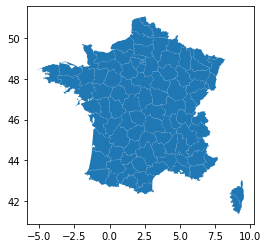

In [41]:
new_structure.plot()

In [43]:
import topojson as tp

topo = tp.Topology(new_structure)
topo.to_json('france_dept.topo.json')